<h1 style = "color: green"> Esercitazione 3 </h1>

<h3 style = "color: blue"> Esercizio 3.1 </h3>

In questo esercizio trattiamo un esempio di option pricing (prezzatura delle opzioni) applicato alla più semplice delle opzioni, cioè quella europea (European option). Il prezzo delle opzioni call e put europee (call option e put option) può essere determinato analiticamente grazie al modello di Black-Scholes.  

Questo modello assume che l'evoluzione temporale del prezzo di un bene sia stocastica e segua un moto browniano geometrico (GBM).  
Indichiamo con $S(t)$ il prezzo al tempo $t$. I parametri che utilizzeremo sono:
- prezzo iniziale (a $t=0$): $S(0)=100$;
- tempo di scadenza: $T=1$;
- prezzo di esercizio (strike price): $K=100$;
- tasso d'interesse privo di rischio (risk-free interest rate): $r=0.1$;
- volatilità: $\sigma =0.25$.

La predizione del modello risulta essere:
- prezzo dell'opzione call: $C=14.975790778311286$;
- prezzo dell'opzione put: $P=5.4595325819072364$.

(Nel seguito è omesso il codice che genera questi risultati, essendo fornito nella consegna).

Possiamo anche risolvere numericamente il problema, sempre assumendo che il prezzo $S$ segua un GBM con drift $r$ e volatilità $\sigma^2$. Per campionare i valori di $S$ a tempi discretizzati possiamo usare
$$S(t_{i+1}) = S(t_i) \exp\left( \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)+\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right)$$
con $Z_i \sim \mathcal{N}(0,1)$ ottenuta campionando la distribuzione normale standard.  

Risolviamo il problema in due modi: possiamo campionare direttamente il valore $S(T)$ usando quindi un solo passo, oppure dividere l'intervallo $[0, T]$ in un certo numero di passi, in questo caso $100$, e campionare $S(t=0.01)$, $S(t=0.02)$ , $...$, $S(t=T=1)$.  
Il valore dell'opzione call sarà poi $C(S(0), 0)=\langle e^{-rT}max(0, S(T)-K)\rangle$, quello dell'opzione put sarà $P(S(0), 0)=\langle e^{-rT}max(0, K-S(T))\rangle$.

Ripetiamo, sia per l'opzione call sia per la put, entrambi questi procedimenti $M=10^5$ volte e calcoliamo valori finali e incertezze con il metodo della media a blocchi con $N=100$ blocchi.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def loadFile(name):
    dataFile = open(name, "r")
    lines = dataFile.readlines()
    fileLength = len(lines)
    mean = np.empty(fileLength)
    uncertainty = np.empty(fileLength)
    for i in range(fileLength):
        values = lines[i].split()
        mean[i], uncertainty[i] = float(values[0]), float(values[1])

    dataFile.close()

    return mean, uncertainty, fileLength

valori attesi:
call: 14.975790778311286
put: 5.4595325819072364

campionamento diretto:
call: 14.985 +- 0.074
put: 5.450 +- 0.031

campionamento del GMB discretizzato:
call: 15.097 +- 0.061
put: 5.474 +- 0.030


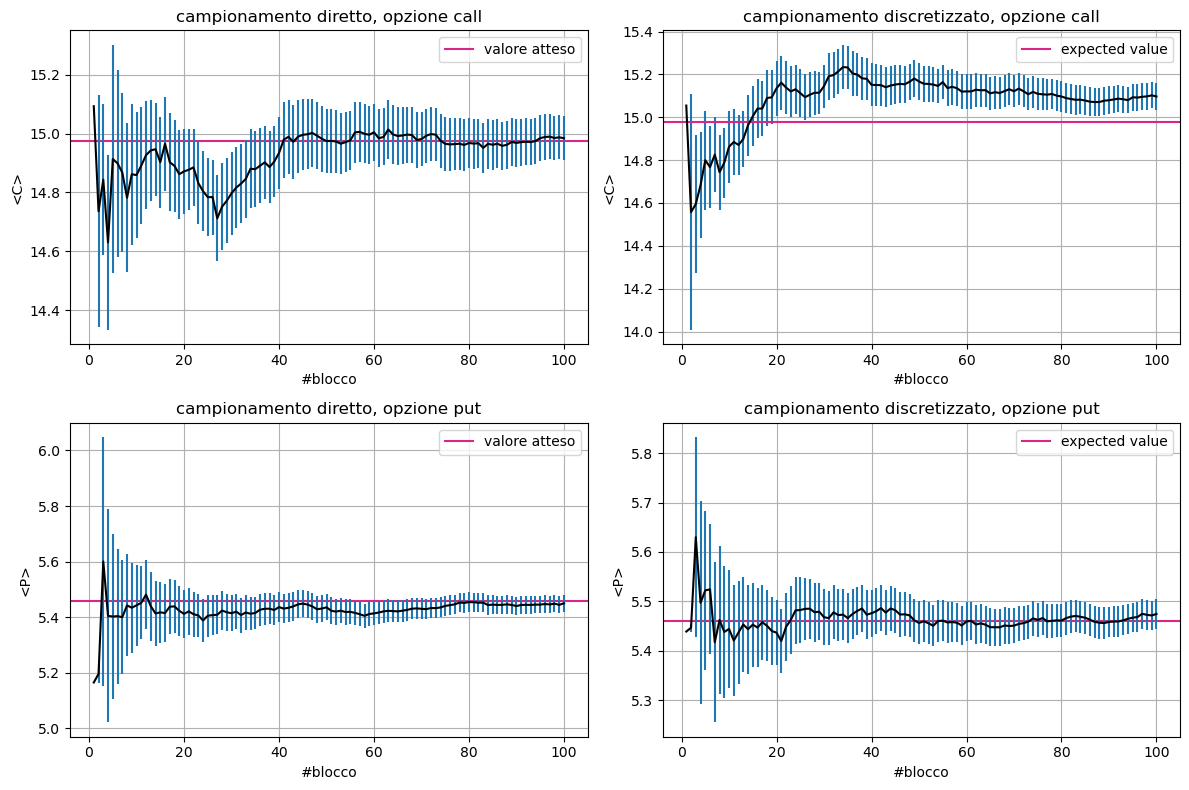

In [2]:
# expected values
Ecall = 14.975790778311286
Eput = 5.4595325819072364

print("valori attesi:")
print("call: " + str(Ecall))
print("put: " + str(Eput))

fig, ax = plt.subplots(2, 2, figsize = (12, 8))


# direct sampling of the final value S(T)
# call
print("\ncampionamento diretto:")
mean, uncertainty, fileLength = loadFile("code/data/data-3.1.1-call.out")
x = np.arange(fileLength) + 1

ax[0, 0].axhline(y = Ecall, color = "#d82786", label = "valore atteso")
ax[0, 0].errorbar(x, mean, yerr = uncertainty, color = "black", ecolor = "#1f77b4")
ax[0, 0].set(title = "campionamento diretto, opzione call", xlabel = "#blocco", ylabel = "<C>")
ax[0, 0].grid(True)
ax[0, 0].legend()

print("call: %.3f +- %.3f" % (mean[-1], uncertainty[-1]))

# put
mean, uncertainty, fileLength = loadFile("code/data/data-3.1.1-put.out")
x = np.arange(fileLength) + 1

ax[1, 0].axhline(y = 5.4595325819072364, color = "#d82786", label = "valore atteso")
ax[1, 0].errorbar(x, mean, yerr = uncertainty, color = "black", ecolor = "#1f77b4")
ax[1, 0].set(title = "campionamento diretto, opzione put", xlabel = "#blocco", ylabel = "<P>")
ax[1, 0].grid(True)
ax[1, 0].legend()

print("put: %.3f +- %.3f" % (mean[-1], uncertainty[-1]))


# discretized GBM
# call
print("\ncampionamento del GMB discretizzato:")
mean, uncertainty, fileLength = loadFile("code/data/data-3.1.2-call.out")
x = np.arange(fileLength) + 1

ax[0, 1].errorbar(x, mean, yerr = uncertainty, color = "black", ecolor = "#1f77b4")
ax[0, 1].set(title = "campionamento discretizzato, opzione call", xlabel = "#blocco", ylabel = "<C>")
ax[0, 1].grid(True)
ax[0, 1].axhline(y = Ecall, color = "#d82786", label = "expected value")
ax[0, 1].legend()

print("call: %.3f +- %.3f" % (mean[-1], uncertainty[-1]))

# put
mean, uncertainty, fileLength = loadFile("code/data/data-3.1.2-put.out")
x = np.arange(fileLength) + 1

ax[1, 1].axhline(y = Eput, color = "#d82786", label = "expected value")
ax[1, 1].errorbar(x, mean, yerr = uncertainty, color = "black", ecolor = "#1f77b4")
ax[1, 1].set(title = "campionamento discretizzato, opzione put", xlabel = "#blocco", ylabel = "<P>")
ax[1, 1].grid(True)
ax[1, 1].legend()

print("put: %.3f +- %.3f" % (mean[-1], uncertainty[-1]))


fig.tight_layout()
plt.show()

Il valore finale trovato è compatibile in tutti e quattro i casi con il valore atteso. Notiamo che le incertezze relative ai valori trovati con il metodo discretizzato sono leggermente inferiori.